In [1]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from functions_and_objects import (impute_means_zeros_maxs_X,parse_percentage,
                                   clean_LC_data_classification_eval,preprocessing_eval, 
                                   columns_list, nan_max_cols, nan_mean_cols, nan_zero_cols, dtype,
                                   one_hot_encode_eval, concat_X_and_6ohe_dfs,
                                   prep_all_df_for_classification,
                                   classification_model_eval_prep_pipeline,
                                   current_pipeline)

import joblib
from sklearn.metrics import (accuracy_score, precision_score, recall_score, #classification
                             f1_score, roc_auc_score, roc_curve,precision_recall_fscore_support, #classification
                             r2_score,mean_squared_error) #regression

from sklearn.preprocessing import StandardScaler
from sklearn.calibration import calibration_curve
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


## Test Cleaning/Preprocessing Functions

In [2]:
raw_q42017 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2017Q4.csv',header=1)
raw_q32017 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2017Q3.csv',header=1)
raw_q22017 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2017Q2.csv',header=1)
raw_q12017 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2017Q1.csv',header=1)
raw_q42016 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2016Q4.csv',header=1)
raw_q32016 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2016Q3.csv',header=1)
raw_q22016 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2016Q2.csv',header=1)
raw_q12016 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2016Q1.csv',header=1)
raw_2015 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2015.csv',header=1)
raw_2014 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2014.csv',header=1)
raw_2012to2013 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2012to2013.csv',header=1)
raw_2007to2011 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2007to2011.csv',header=1)

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,118) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,19,59) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/

In [3]:
dfs_list = [raw_q42017,raw_q32017,raw_q22017,raw_q12017,
           raw_q42016,raw_q32016,raw_q22016,raw_q12016,raw_2015,
           raw_2014,raw_2012to2013, raw_2007to2011]

In [4]:
(X_train_classif, X_test_classif, y_train_classif, y_test_classif) = classification_model_eval_prep_pipeline(dfs_list)

/home/jupyter/peervest/functions_and_objects.py:243: FutureWarning: Passing datetime64-dtype data to TimedeltaIndex is deprecated, will raise a TypeError in a future version
  raw_lc_df['earliest_cr_line'] = pd.to_timedelta(pd.to_datetime(raw_lc_df['earliest_cr_line'])).dt.days
/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/home/jupyter/peervest/functions_and_objects.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X_train[col] = X_train[col].fillna(0.0)
/home/jupyter/peervest/functions_and_objects.py:197: Setti

In [5]:
print(X_train_classif.shape)
print(y_train_classif.shape)
print(X_test_classif.shape)
print(y_test_classif.shape)

(880950, 1108)
(880950, 1)
(377551, 1108)
(377551, 1)


### Neural Network Classification Model

##### Fit

In [5]:
ss = StandardScaler()
X_train_classif_s = ss.fit_transform(X_train_classif)
X_test_classif_s = ss.transform(X_test_classif)

In [10]:
X_train_classif_s

array([[ 0.62121525,  0.62250523,  0.91077999, ..., -0.043633  ,
        -0.05705072, -0.03939376],
       [ 0.04623632,  0.04726958, -0.42602655, ..., -0.043633  ,
        -0.05705072, -0.03939376],
       [ 0.16123211,  0.16231671,  0.27184228, ..., -0.043633  ,
        -0.05705072, -0.03939376],
       ...,
       [-1.00022532, -0.99965929, -0.86988914, ..., -0.043633  ,
        -0.05705072, -0.03939376],
       [ 0.27622789,  0.27736384, -0.3839326 , ..., -0.043633  ,
        -0.05705072, -0.03939376],
       [ 0.39122368,  0.39241097,  0.45438799, ..., -0.043633  ,
        -0.05705072, -0.03939376]])

In [6]:
X_train_classif_s = X_train_classif_s.astype('float32')

In [7]:
X_test_classif_s = X_test_classif_s.astype('float32')

In [13]:
np.array(y_train_classif['loan_status'])

array([1, 0, 1, ..., 1, 0, 1], dtype=object)

In [9]:
y_train_classif['loan_status'] = y_train_classif['loan_status'].astype(int)
y_test_classif['loan_status'] = y_test_classif['loan_status'].astype(int)

In [15]:
model = Sequential()
n_input = X_train_classif_s.shape[1]
n_hidden = n_input

model.add(Dense(n_hidden, input_dim=n_input, activation='sigmoid',kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(rate=0.2))
model.add(Dense(562,activation='sigmoid',kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(rate=0.2))
model.add(Dense(50,activation='sigmoid',kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(10,activation='sigmoid',kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.0001)))

In [16]:
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [17]:
early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-08, patience=0, verbose=1, mode='auto')
callbacks_list = [early_stop]

In [18]:
history_log = model.fit(X_train_classif_s, y_train_classif, 
                        validation_data=(X_test_classif_s, y_test_classif), 
                        epochs=7, 
                        callbacks=callbacks_list, 
                        batch_size=1000)

Train on 880950 samples, validate on 377551 samples
Epoch 1/7
880950/880950 [==============================] - 292s 331us/step - loss: 0.3793 - acc: 0.8714 - val_loss: 0.1544 - val_acc: 0.9662
Epoch 2/7
880950/880950 [==============================] - 291s 330us/step - loss: 0.1391 - acc: 0.9692 - val_loss: 0.1468 - val_acc: 0.9619
Epoch 3/7
880950/880950 [==============================] - 287s 326us/step - loss: 0.1188 - acc: 0.9733 - val_loss: 0.1244 - val_acc: 0.9679
Epoch 4/7
880950/880950 [==============================] - 282s 321us/step - loss: 0.1108 - acc: 0.9750 - val_loss: 0.1049 - val_acc: 0.9762
Epoch 5/7
880950/880950 [==============================] - 284s 322us/step - loss: 0.1051 - acc: 0.9763 - val_loss: 0.1194 - val_acc: 0.9712
Epoch 00005: early stopping


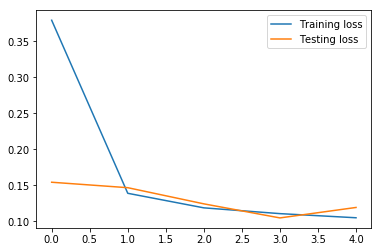

In [20]:
plt.plot(history_log.history['loss'], label='Training loss')
plt.plot(history_log.history['val_loss'], label='Testing loss')
plt.legend();

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1108)              1228772   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1108)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 562)               623258    
_________________________________________________________________
dropout_2 (Dropout)          (None, 562)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                28150     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total para

In [22]:
y_test_classif_preds = model.predict_classes(X_test_classif_s)

In [23]:
y_test_classif_preds

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int32)

In [24]:
nn_v4_class_preds_proba = model.predict_proba(X_test_classif_s)

In [25]:
nn_v4_class_preds_proba

array([[0.0055435 ],
       [0.995689  ],
       [0.9965471 ],
       ...,
       [0.9973277 ],
       [0.9981444 ],
       [0.00558357]], dtype=float32)

(array([ 48267.,   4329.,   2204.,   1520.,   1146.,    917.,    857.,
           711.,    668.,    619.,    509.,    545.,    529.,    554.,
           551.,    542.,    578.,    593.,    576.,    664.,    714.,
           787.,    851.,   1059.,   1202.,   1594.,   2195.,   3707.,
          8129., 290434.]),
 array([0.        , 0.03333334, 0.06666667, 0.1       , 0.13333334,
        0.16666667, 0.2       , 0.23333333, 0.26666668, 0.3       ,
        0.33333334, 0.36666667, 0.4       , 0.43333334, 0.46666667,
        0.5       , 0.53333336, 0.56666666, 0.6       , 0.6333333 ,
        0.6666667 , 0.7       , 0.73333335, 0.76666665, 0.8       ,
        0.8333333 , 0.8666667 , 0.9       , 0.93333334, 0.96666664,
        1.        ], dtype=float32),
 <a list of 30 Patch objects>)

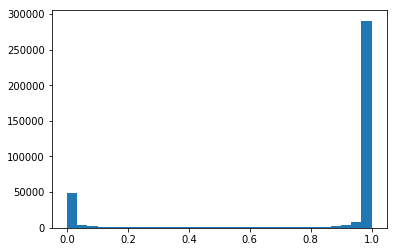

In [36]:
plt.hist(nn_v4_class_preds_proba,bins=30,range=(0,1))

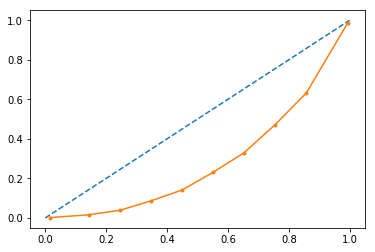

In [27]:
# reliability diagram
fop, mpv = calibration_curve(y_test_classif, nn_v4_class_preds_proba, n_bins=10)
# plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle='--')
# plot model reliability
plt.plot(mpv, fop, marker='.')
plt.show()

In [28]:
y_test_classif['loan_status'] = y_test_classif['loan_status'].astype(int)

##### Predict & Eval NN_v2

In [21]:
#print ("Precision Fully Paid: {}".format(precision_score(y_test_classif['loan_status'],y_test_classif_preds)))
#print ("Recall Fully Paid: {}".format(recall_score(y_test_classif['loan_status'],y_test_classif_preds)))
#print ("F-1 Score Fully Paid: {}".format(f1_score(y_test_classif['loan_status'],y_test_classif_preds)))
#print ("ROC-AUC Score: {}".format(roc_auc_score(y_test_classif['loan_status'],y_test_classif_preds)))

Precision Fully Paid: 0.9872847917296892
Recall Fully Paid: 0.9877719804983321
F-1 Score Fully Paid: 0.9875283260263971
ROC-AUC Score: 0.9676073977542289


In [22]:
#precision, recall, f1-score
#print ("Precision, Recall, F, & Support By Class [0,1] aka [Default,Fully Paid]: {}".format(
#    precision_recall_fscore_support(y_test_classif['loan_status'],y_test_classif_preds)))

#print ("Precision, Recall, F, & Support Weighted Average by Support: {}".format(
#    precision_recall_fscore_support(y_test_classif['loan_status'],y_test_classif_preds,average='weighted')))

Precision, Recall, F, & Support By Class [0,1] aka [Default,Fully Paid]: (array([0.94937829, 0.98728479]), array([0.94744282, 0.98777198]), array([0.94840957, 0.98752833]), array([ 73577, 303974]))
Precision, Recall, F, & Support Weighted Average by Support: (0.9798975874129687, 0.9799126475628458, 0.9799048766738255, None)


### Save NN_v2 Model to JobLib

- changed architecture of Neural Network with additional layers, added L2 regularization, dropout, and early stopping

In [ ]:
#filename = 'nn_v2.joblib'
#joblib.dump(model, filename)

##### Predict & Eval NN_v3

### Save NN_v3 Model to JobLib

- changed X_train_classif_s to type 'float32' to see whether this improved calibration
- larger batch size for speed of model.fit

In [26]:
#filename = 'nn_v3.joblib'
#joblib.dump(model, filename)

['nn_v3.joblib']

In [30]:
#print ("Precision Fully Paid: {}".format(precision_score(y_test_classif['loan_status'],y_test_classif_preds)))
#print ("Recall Fully Paid: {}".format(recall_score(y_test_classif['loan_status'],y_test_classif_preds)))
#print ("F-1 Score Fully Paid: {}".format(f1_score(y_test_classif['loan_status'],y_test_classif_preds)))
#print ("ROC-AUC Score: {}".format(roc_auc_score(y_test_classif['loan_status'],y_test_classif_preds)))

Precision Fully Paid: 0.9775323474744307
Recall Fully Paid: 0.9844624869232237
F-1 Score Fully Paid: 0.980985177912582
ROC-AUC Score: 0.9454910936865463


In [31]:
#precision, recall, f1-score
#print ("Precision, Recall, F, & Support By Class [0,1] aka [Default,Fully Paid]: {}".format(
#    precision_recall_fscore_support(y_test_classif['loan_status'],y_test_classif_preds)))

#print ("Precision, Recall, F, & Support Weighted Average by Support: {}".format(
#    precision_recall_fscore_support(y_test_classif['loan_status'],y_test_classif_preds,average='weighted')))

Precision, Recall, F, & Support By Class [0,1] aka [Default,Fully Paid]: (array([0.93387192, 0.97753235]), array([0.9065197 , 0.98446249]), array([0.91999255, 0.98098518]), array([ 73577, 303974]))
Precision, Recall, F, & Support Weighted Average by Support: (0.9690238186910873, 0.9692730253661095, 0.96909895734676, None)


### Save NN_v4 Model to JobLib

- changed hidden layer activation functions to Sigmoid instead of ReLU as ReLU pushes predict_proba to the extremes 0 and 1

In [29]:
filename = 'nn_v4.joblib'
joblib.dump(model, filename)

['nn_v4.joblib']

In [30]:
print ("Precision Fully Paid: {}".format(precision_score(y_test_classif['loan_status'],y_test_classif_preds)))
print ("Recall Fully Paid: {}".format(recall_score(y_test_classif['loan_status'],y_test_classif_preds)))
print ("F-1 Score Fully Paid: {}".format(f1_score(y_test_classif['loan_status'],y_test_classif_preds)))
print ("ROC-AUC Score: {}".format(roc_auc_score(y_test_classif['loan_status'],y_test_classif_preds)))

Precision Fully Paid: 0.9672634515743324
Recall Fully Paid: 0.997973510892379
F-1 Score Fully Paid: 0.9823785336439987
ROC-AUC Score: 0.9292163108779141


In [31]:
#precision, recall, f1-score
print ("Precision, Recall, F, & Support By Class [0,1] aka [Default,Fully Paid]: {}".format(
    precision_recall_fscore_support(y_test_classif['loan_status'],y_test_classif_preds)))

print ("Precision, Recall, F, & Support Weighted Average by Support: {}".format(
    precision_recall_fscore_support(y_test_classif['loan_status'],y_test_classif_preds,average='weighted')))

Precision, Recall, F, & Support By Class [0,1] aka [Default,Fully Paid]: (array([0.99036386, 0.96726345]), array([0.86045911, 0.99797351]), array([0.92085264, 0.98237853]), array([ 73577, 303974]))
Precision, Recall, F, & Support Weighted Average by Support: (0.9717652503223433, 0.9711747551986354, 0.970388389331882, None)
